In [1]:
import pandas as pd

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [4]:
rows = []
for r in read_json_gz_lines('../../data/clf-ava-pcorr.json/'):
    rows += r['pcorr']

In [5]:
df = pd.DataFrame(rows)

In [7]:
df.head(10)

,d1,d2,kt_corr,pr_corr,sp_corr,label
0,apnews.com,bloomberg.com,0.234786,-0.031257,0.344494,apnews.com - bloomberg.com
1,apnews.com,breitbart.com,0.305519,0.059502,0.442030,apnews.com - breitbart.com
2,apnews.com,buzzfeed.com,-0.265385,-0.229123,-0.386375,apnews.com - buzzfeed.com
3,apnews.com,cnn.com,0.266096,0.141906,0.386486,apnews.com - cnn.com
4,apnews.com,dailycaller.com,0.092015,-0.088893,0.145099,apnews.com - dailycaller.com
5,apnews.com,dailykos.com,-0.206319,-0.239817,-0.287446,apnews.com - dailykos.com
6,apnews.com,foxnews.com,0.502688,0.360764,0.688627,apnews.com - foxnews.com
7,apnews.com,huffingtonpost.com,-0.135410,-0.187067,-0.198847,apnews.com - huffingtonpost.com
8,apnews.com,msnbc.com,-0.004772,-0.145798,0.003555,apnews.com - msnbc.com
9,apnews.com,npr.org,0.215587,0.063123,0.315592,apnews.com - npr.org


In [6]:
df['label'] = df[['d1', 'd2']].apply(lambda x: f'{x[0]} - {x[1]}', axis=1)

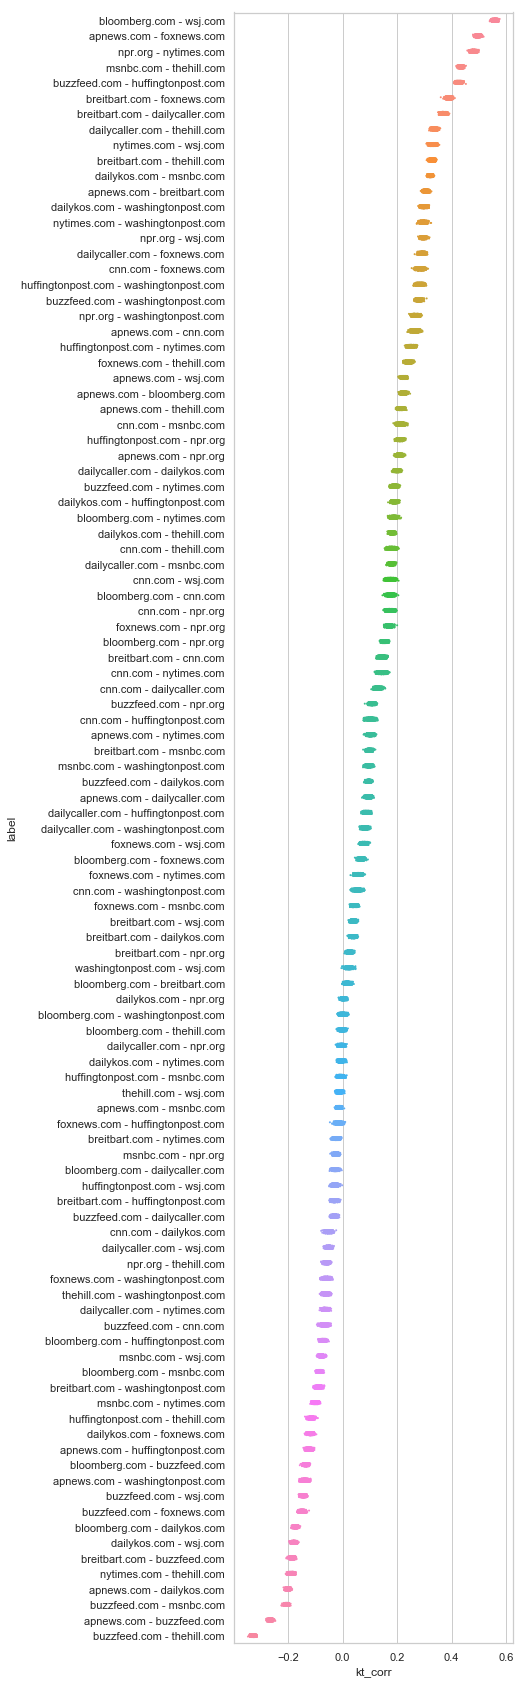

In [14]:
order = df.groupby('label').mean().kt_corr.sort_values(ascending=False).index
plt.figure(figsize=(5,30))
sns.stripplot(x='kt_corr', y='label', data=df, order=order, s=2)

In [16]:
out_df = df.groupby(['d1', 'd2']).mean().reset_index()

In [19]:
out_df.to_json('data/hl-graph-lr-pcorr.json', orient='records', lines=True)